In [6]:
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.neighbors import KNeighborsClassifier
import pickle
from sklearn.datasets import fetch_openml
import gzip

KNN score: 0.9611111111111111


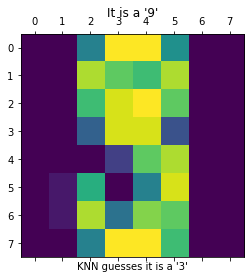

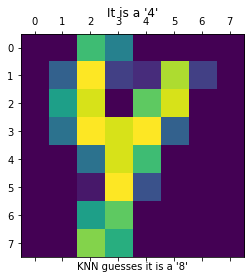

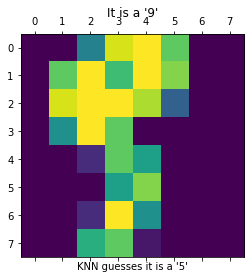

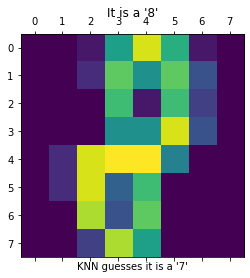

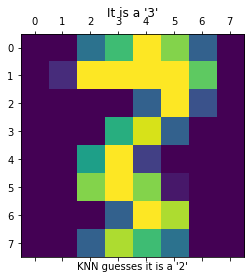

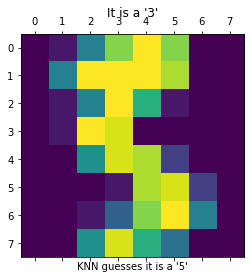

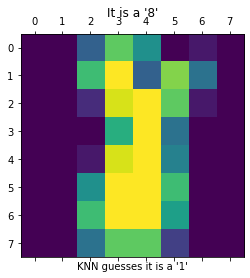

In [10]:
# This cell use 8 * 8 pixels' digits for number recognition.
# You can treat it as a toy example.

X_digits, y_digits = datasets.load_digits(return_X_y=True)
X_digits = X_digits / X_digits.max()
n_samples = len(X_digits)
divide = int(.9 * n_samples)

X_train = X_digits[:divide]
y_train = y_digits[:divide]
X_test = X_digits[divide:]
y_test = y_digits[divide:]

knnmodel = KNeighborsClassifier().fit(X_train, y_train)

# its important to use binary mode
with gzip.open('mnist_train_file', 'wb') as train_data:
    pickle.dump(knnmodel, train_data)
# source, destination

with gzip.open('mnist_train_file', 'rb') as lm:
    loaded_model = pickle.load(lm)

    predict = loaded_model.predict(X_test)
    # the % of correct guess
    print(f'KNN score: {loaded_model.score(X_test, y_test)}')

    # # show knn wrong guesses
    for i in range((y_test.shape)[0]):
        if predict[i] != y_test[i]:
            plt.matshow(X_test[i].reshape(8, 8))
            plt.title(f"It is a '{y_test[i]}'")
            plt.xlabel(f"KNN guesses it is a '{predict[i]}'")
        

In [5]:
#Don't use the training data for testing 
#The cell below is a wrong example

In [30]:
# What if we use the hold dat set for training?
# prob increases but it's useless and it just mermorize data!
X_digits, y_digits = datasets.load_digits(return_X_y=True)
X_digits = X_digits / X_digits.max()
#load the model from disk
loaded_model = pickle.load(open('knnpickle_file', 'rb'))
predict = loaded_model.predict(X_digits)
print(f'KNN score: {loaded_model.score(X_digits, y_digits)}')
# for i in range((y_digits.shape)[0]):
#     if predict[i] != y_digits[i]:
#         plt.matshow(X_digits[i].reshape(8, 8))
#         plt.title(f"It is a '{y_digits[i]}'")
#         plt.xlabel(f"KNN guesses it is a '{predict[i]}'")

KNN score: 0.9872008903728436


KNN score: 0.9767142857142858


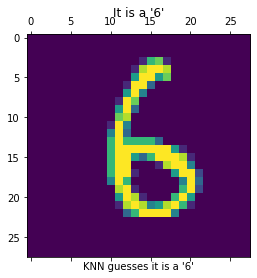

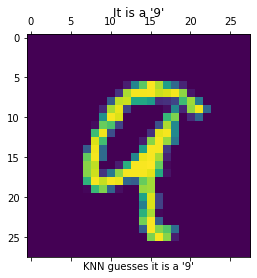

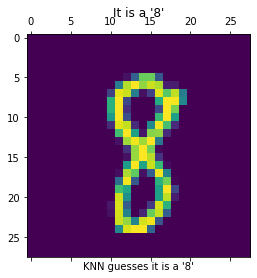

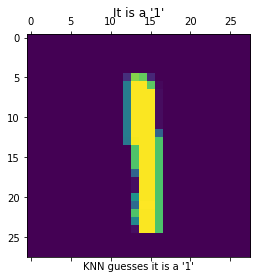

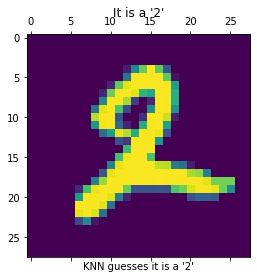

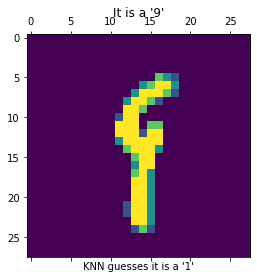

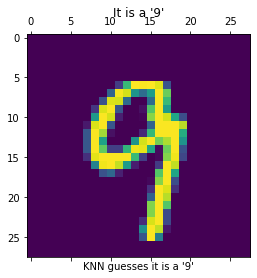

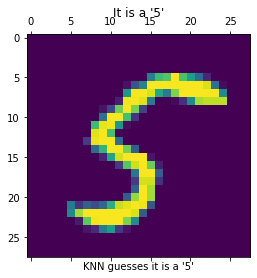

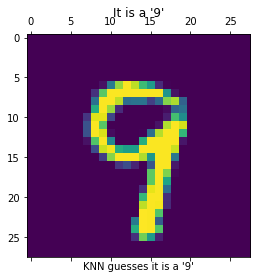

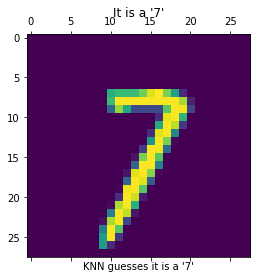

In [4]:
X, y = fetch_openml('mnist_784', return_X_y=True)
X = X / X.max()
n_samples = len(X)
divide = int(.9 * n_samples)

X_train = X[:divide]
y_train = y[:divide]
X_test = X[divide:]
y_test = y[divide:]

# knnmodel = KNeighborsClassifier().fit(X_train, y_train)

# its important to use binary mode
with gzip.open('mnist_train_file', 'wb') as train_data:
    pickle.dump(knnmodel, train_data) # source, destination

with gzip.open('mnist_train_file', 'rb') as lm:
    loaded_model = pickle.load(lm)

    predict = loaded_model.predict(X_test)
    # the % of correct guess
    print(f'KNN score: {loaded_model.score(X_test, y_test)}')


    for i in range(10):
        plt.matshow(X_test[i].reshape(28, 28))
        plt.title(f"It is a '{y_test[i]}'")
        plt.xlabel(f"KNN guesses it is a '{predict[i]}'")